# Small Project

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

In this project, I'll try to predict the total number of bikes people rented in a given hour. I'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, I'll create a few different machine learning models and evaluate their performances.

Data is collected from [the University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [2]:
import pandas as pd
import numpy as np

bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


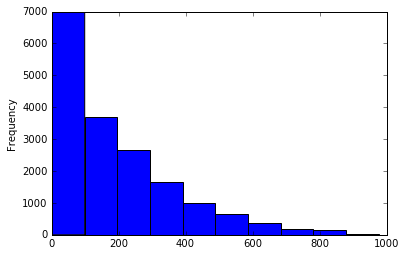

In [3]:
%matplotlib inline
bike_rentals["cnt"].plot.hist()

In [4]:
bike_rentals.corr()["cnt"].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [5]:
def assign_label(df, range, labels):
    df["time_label"] = pd.cut(df["hr"], range, labels=labels)
    return df

bike_rentals = assign_label(bike_rentals, [-1,6,12,18,24], [4, 1, 2, 3])

In [6]:
bike_rentals.shape

(17379, 18)

In [7]:
new_index = np.random.permutation(bike_rentals.index)
shuffle = bike_rentals.reindex(new_index)

midpoint = int(0.8*len(shuffle))
train = shuffle.iloc[:midpoint]
test = shuffle.iloc[midpoint:]


print(train.head())
print(test.head())

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
15375    15376  2012-10-07       4   1    10  20        0        0   
11236    11237  2012-04-18       2   1     4   9        0        3   
6417      6418  2011-09-29       4   0     9  23        0        4   
5354      5355  2011-08-16       3   0     8   0        0        2   
9697      9698  2012-02-14       1   1     2   0        0        2   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
15375           0           1  0.40  0.4091  0.82     0.1343      19   
11236           1           3  0.48  0.4697  0.44     0.2985      20   
6417            1           1  0.52  0.5000  0.77     0.1045      17   
5354            1           1  0.64  0.6061  0.69     0.1045       8   
9697            1           2  0.26  0.3030  0.60     0.0000       0   

       registered  cnt time_label  
15375          97  116          3  
11236         245  265          1  
6417           64   81          3  
53

In [8]:
def remove_features(df, features):
    df = df.drop(features, axis=1)
    return df

exc_cols = ["casual", "dteday", "registered", "hr", "instant"]
train = remove_features(train, exc_cols)
test = remove_features(test, exc_cols)

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = train.drop(["cnt"], axis=1).columns
target = "cnt"

lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
print(mse)

17264.599651713197


## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf =5)
dt.fit(train[features], train[target])

predictions_dt = dt.predict(test[features])
mse = mean_squared_error(test[target], predictions_dt)
print(mse)

13305.531651215051


## Random Forest Tree

In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[features], train[target])

predictions_reg = reg.predict(test[features])
mse_reg = mean_squared_error(test[target], predictions_reg)
print(mse_reg)

11086.159590150333


Random Forest Tree algorithm performs relatively better compared to the other algorithms fairly because it is more complex algorithms that is capable of minimising underfiting and overfiting of the train data. 